In [1]:
from multiprocessing import cpu_count

n = str(cpu_count())
import os
os.environ["OMP_NUM_THREADS"] = n # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = n # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = n # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = n # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = n # export NUMEXPR_NUM_THREADS=6

from lattice import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# without: 8 s
# normal: 21 s
# more eff.: 21 s (also loops twice thanks to boundary sites)

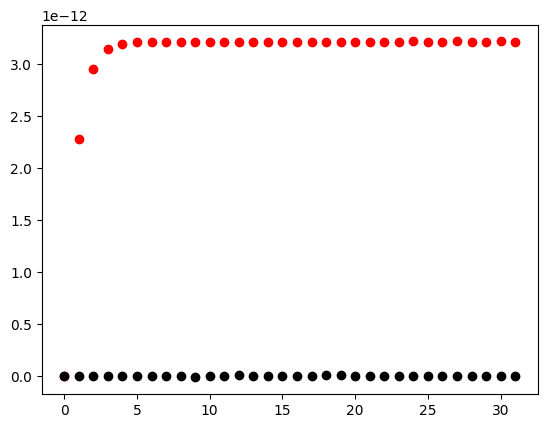

In [141]:
offset = np.trace(l.states[0] * (l.N / 2)).real 
for i, state in enumerate(l.states[::10]):
    state2 = state * (l.N / 2)
    min_eig = np.linalg.eigvalsh(state2).min().real
    plt.scatter(i, min_eig , color="red")
    plt.scatter(i, offset - np.trace(state2).real , color="black")

# plt.yscale("log")

In [ ]:
omega = 2
geometry = HexagonalLatticeGeometry((7, 20))
# geometry.origin += np.array([10, 10])
l = Lattice2D(
    geometry=geometry,
    simulation_parameters=SimulationParameters(
        t_hop=-1,
        E_amplitude=FieldAmplitudeGenerator.ramped_oscillation(1e-3, omega, 2*np.pi/omega),
        E_direction=np.array([0, -1]),
        h=0.1,
        T=10 * 2 * np.pi / omega,
        substeps=20,
        initial_occupation=0.5,
    ))

l.evolve(decay_time=10*2*np.pi/omega)

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


  0%|          | 0/6283 [00:00<?, ?it/s]

 19%|█▊        | 1164/6283 [00:03<00:15, 332.85it/s]

In [129]:
def fourier_at_omega(signal, dt, omega):
    N = len(signal)
    n = np.arange(N)
    t = n * dt
    phase = np.exp(-1j * omega * t)
    return np.sum(signal * phase) * dt

t_values = np.arange(0, l.h * len(l.states), l.h)
E_values = l.E(t_values)
J_orb_values = np.array(
    [l._orbital_polarisation_current(l._current_density(l.states[i]), l._current_density(l.states[i-1]))[0] for i in range(1, len(l.states))]
)

sigma_oh = fourier_at_omega(J_orb_values, l.h, omega) / fourier_at_omega(E_values[1:], l.h, omega)
print("Orbital Hall conductivity (in units of e/2pi):", abs(sigma_oh))

Orbital Hall conductivity (in units of e/2pi): 6.040491820943896


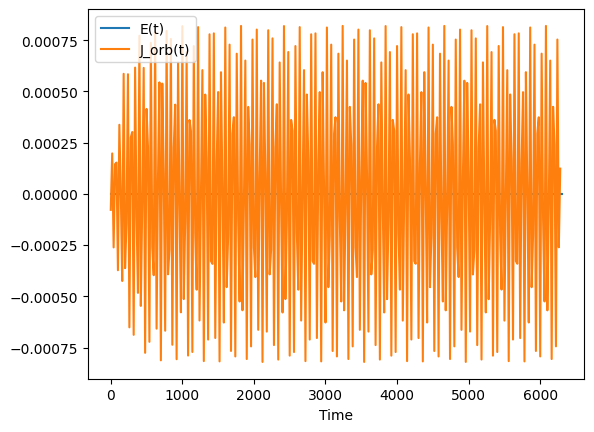

/Users/leonard/dev/projects/university/orbitronics_research_project/orbitronics/lib/python3.11/site-packages/numpy/ma/core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


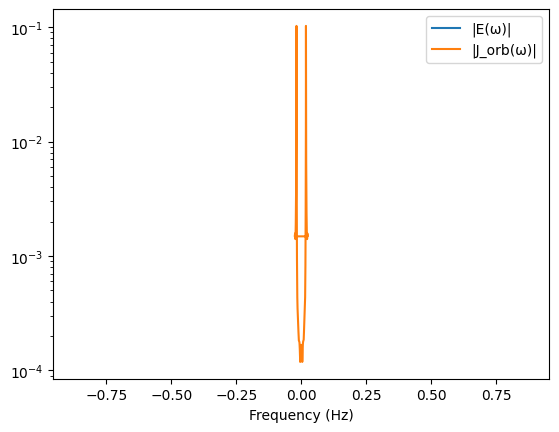

/Users/leonard/dev/projects/university/orbitronics_research_project/lattice/lattice2d.py:412: RuntimeWarning: divide by zero encountered in scalar divide
  sigma_xy = J_omega[index_drive] / E_omega[index_drive]


np.float64(inf)

In [142]:
abs(l.orbital_hall_conductivity(omega))

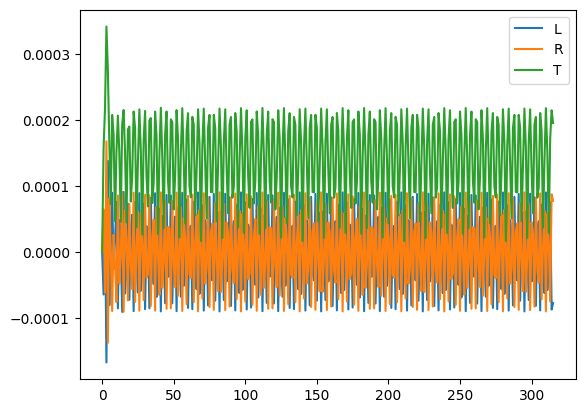

-7.751340336515144e-05 7.751340336540259e-05 0.00019544827444359513


In [143]:
Ls = []
Rs = []
Ts = []

for state in l.states:
    J = l._current_density(state)
    L = 0
    R = 0
    T = 0
    for (site, charge) in l._orbital_charges(J).items():
        #if site % l.Lx < 2 or site % l.Lx > l.Lx - 5:
        #    continue
        if site % l.Lx < (l.Lx-2)/2:
            L += charge
        elif site % l.Lx > (l.Lx-2)/2:
            R += charge
        T += abs(charge)

    Rs.append(R)
    Ts.append(T)
    Ls.append(L)

plt.plot(Ls, label='L')
plt.plot(Rs, label='R')
plt.plot(Ts, label='T')
plt.legend()
plt.show()

print(L, R, T)

In [15]:
len(Rs)

630

/Users/leonard/dev/projects/university/orbitronics_research_project/lattice/lattice2d.py:659: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


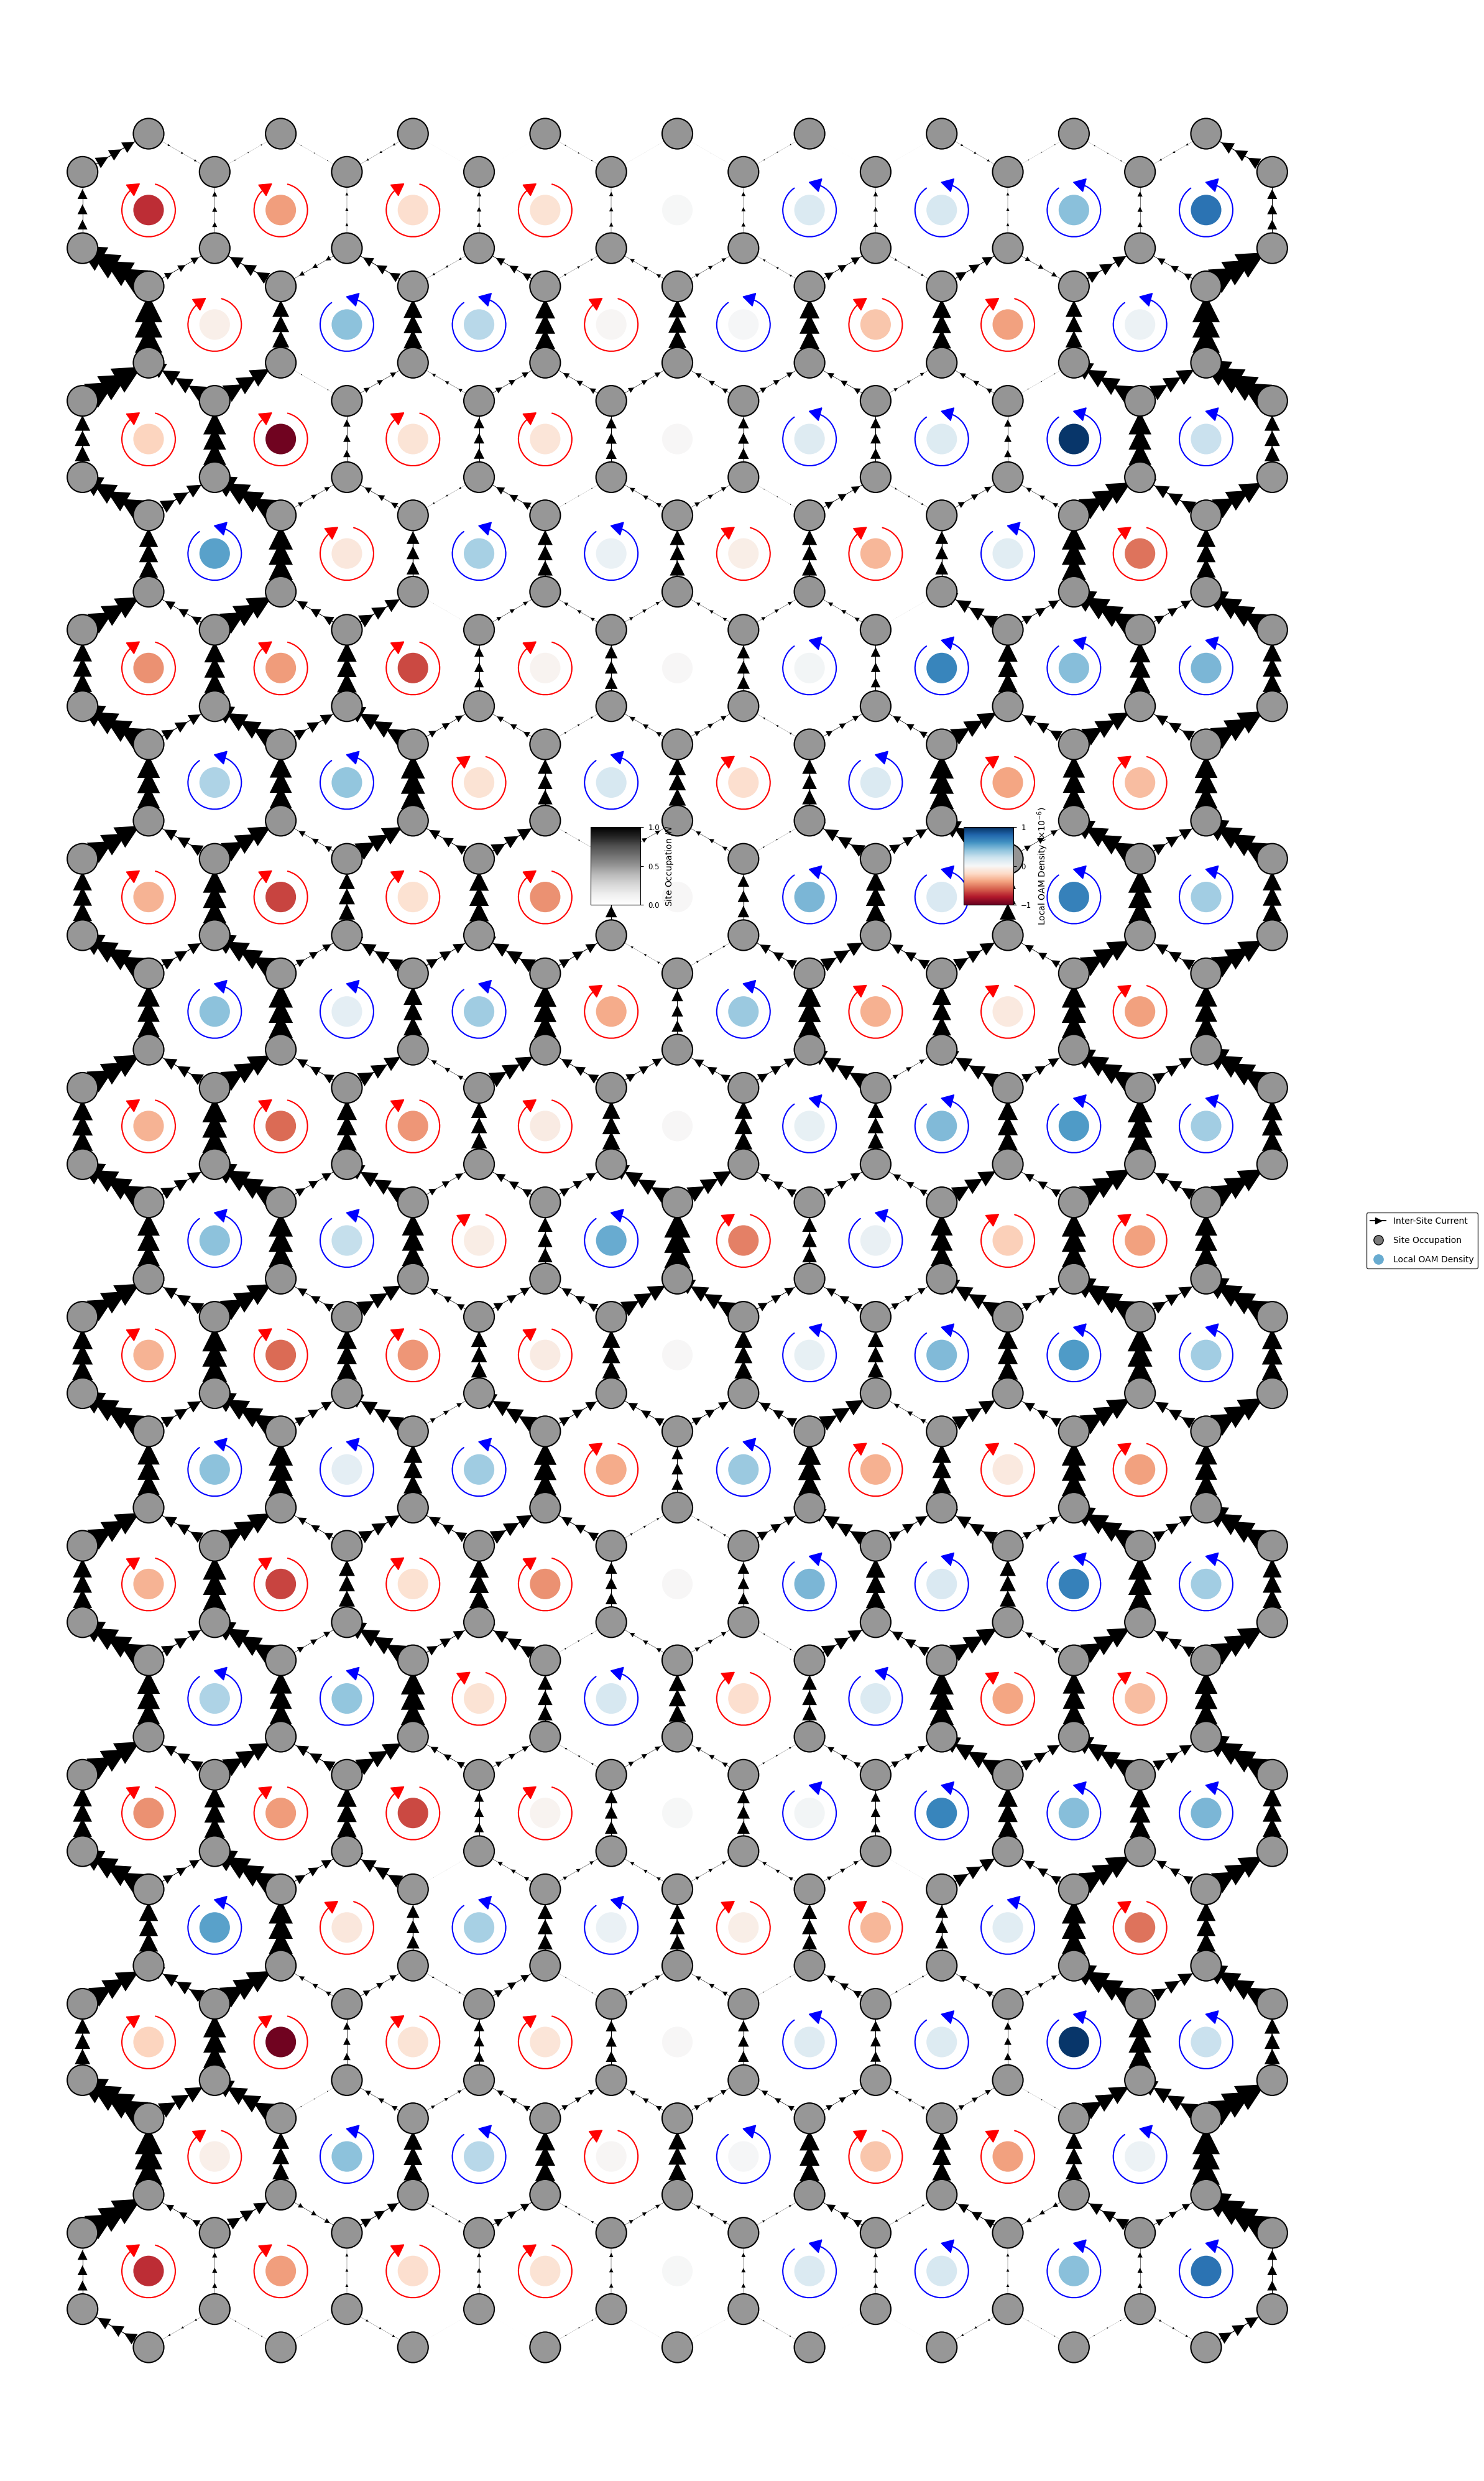

In [27]:
l.plot_current_density(-1, auto_normalize=True)

In [47]:
for Ly in range(20, 102, 2):
    if Ly > 50 and Ly % 4: continue
    dk = np.pi / ( 1.5 * (Ly - 1)) * 3 / 2
    print(f"ly = {Ly}, dk = {dk:.4f} a_NN t")

ly = 20, dk = 0.1653 a_NN t
ly = 22, dk = 0.1496 a_NN t
ly = 24, dk = 0.1366 a_NN t
ly = 26, dk = 0.1257 a_NN t
ly = 28, dk = 0.1164 a_NN t
ly = 30, dk = 0.1083 a_NN t
ly = 32, dk = 0.1013 a_NN t
ly = 34, dk = 0.0952 a_NN t
ly = 36, dk = 0.0898 a_NN t
ly = 38, dk = 0.0849 a_NN t
ly = 40, dk = 0.0806 a_NN t
ly = 42, dk = 0.0766 a_NN t
ly = 44, dk = 0.0731 a_NN t
ly = 46, dk = 0.0698 a_NN t
ly = 48, dk = 0.0668 a_NN t
ly = 50, dk = 0.0641 a_NN t
ly = 52, dk = 0.0616 a_NN t
ly = 56, dk = 0.0571 a_NN t
ly = 60, dk = 0.0532 a_NN t
ly = 64, dk = 0.0499 a_NN t
ly = 68, dk = 0.0469 a_NN t
ly = 72, dk = 0.0442 a_NN t
ly = 76, dk = 0.0419 a_NN t
ly = 80, dk = 0.0398 a_NN t
ly = 84, dk = 0.0379 a_NN t
ly = 88, dk = 0.0361 a_NN t
ly = 92, dk = 0.0345 a_NN t
ly = 96, dk = 0.0331 a_NN t
ly = 100, dk = 0.0317 a_NN t


In [12]:
Px, Py = [], []
Pbulkx, Pbulky = [], []
P_edge, P_edge_shape = [], []
P_tot = []
P_tot2 = [pol[0]/l.N for pol in l.orbital_polarizations]
for state in l.states:
    # equal aspect / xy scaling
    lattice_state = l.compute_lattice_state(state)
    Px.append(lattice_state.orbital_charge_polarisation[0])
    Pbulkx.append(lattice_state.bulk_polarisation[0] / l.N)
    P_edge.append((lattice_state.boundary_polarisation_dipole[0]) / l.N)
    P_edge_shape.append((lattice_state.boundary_polarisation_form[0] ) / l.N)
    P_tot.append(lattice_state.orbital_charge_polarisation_corrected[0] / l.N)
    # break

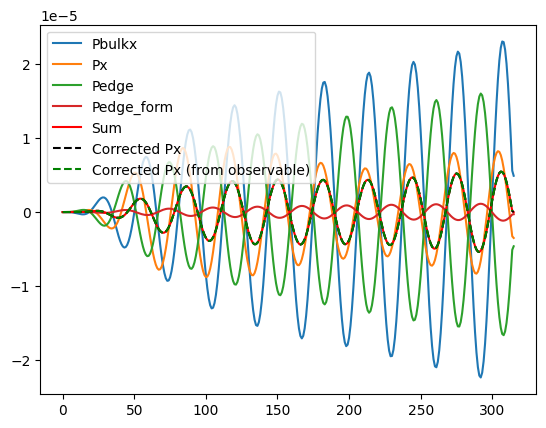

In [13]:
plt.plot(np.array(Pbulkx), label="Pbulkx")
plt.plot(-np.array(Px) * np.sqrt(3) * 4/9 *5, label="Px")
plt.plot(P_edge, label="Pedge")
plt.plot(P_edge_shape, label="Pedge_form")
plt.plot(np.array(Pbulkx) + np.array(P_edge) + np.array(P_edge_shape), "r-", label="Sum")
plt.plot(np.array(P_tot), "k--", label="Corrected Px")
plt.plot(np.array(P_tot2[::20]), "g--", label="Corrected Px (from observable)")
plt.legend()
plt.show()

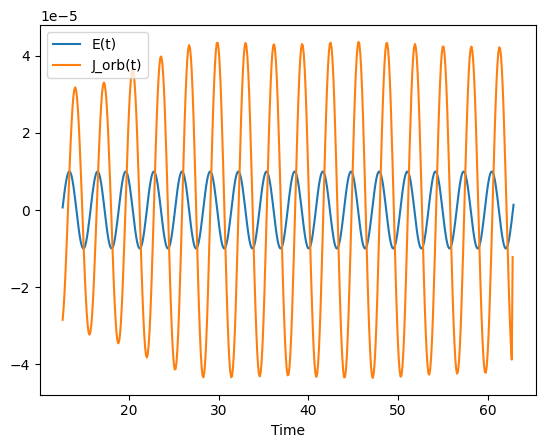

/Users/leonard/dev/projects/university/orbitronics_research_project/orbitronics/lib/python3.11/site-packages/numpy/ma/core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


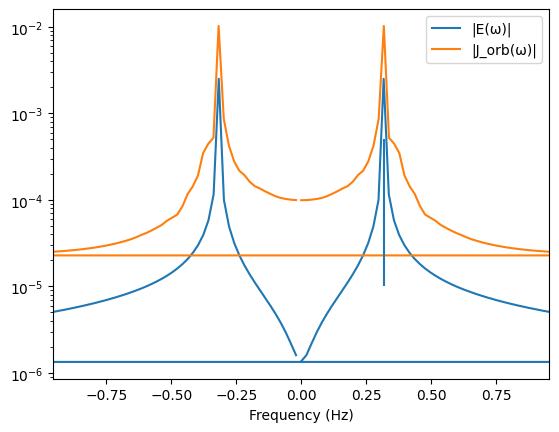

In [35]:
s = l.orbital_hall_conductivity(omega, steady_state_start_time=4 * 2 * np.pi / omega)

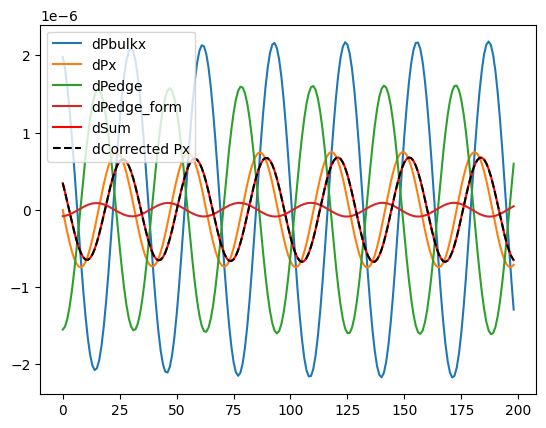

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def discrete_derivative(arr):
    arr = np.array(arr)
    return (arr[1:] - arr[:-1]) / l.h

# compute derivatives
dPx          = discrete_derivative(Px)
dPbulkx      = discrete_derivative(Pbulkx)
dP_edge      = discrete_derivative(P_edge)
dP_edge_shape= discrete_derivative(P_edge_shape)
dP_tot       = discrete_derivative(P_tot)

# plot
plt.plot(dPbulkx,      label="dPbulkx")
plt.plot(-np.array(dPx) * np.sqrt(3) * 4/9 * 5, label="dPx")
plt.plot(dP_edge,      label="dPedge")
plt.plot(dP_edge_shape,label="dPedge_form")
plt.plot(dPbulkx + dP_edge + dP_edge_shape, "r-", label="dSum")
plt.plot(dP_tot, "k--", label="dCorrected Px")
plt.legend()
plt.show()


In [ ]:
E = 1e-5
omega = 4 / np.pi

l = Lattice2D(
    HexagonalLatticeGeometry((11, 20)),
    SimulationParameters(
        t_hop=-1,
        E_amplitude=FieldAmplitudeGenerator.ramped_oscillation(E, omega, 5),
        E_direction=np.array([0, 1]),
        h=0.01,
        T=40,
        substeps=2,
))

describe(l, E, omega)

# l.density_matrix = 1/12 * np.diag([1 if 3<l.geometry.site_to_position(i)[1]<6 else 0 for i in range(l.N)])
l.evolve(first_snapshot_step=0 * 8 / 0.01, decay_time=10)

Initialize Hamiltonian and eigenstates... Done.
Occupation set to 0.50.


,Parameter,Value,Units / Notes
0,Lattice Geometry,HexagonalLatticeGeometry,
1,"Lattice Size (Lx, Ly)","(11, 20)",
2,Hopping Parameter (t),-1.00,
3,Fermi Velocity (v_F),1.500,a|t| (a=1)
4,Bandwidth (W),5.848,|t|
5,E Field Amplitude (E_amp),1.0e-05,
6,E Field Frequency (ω),1.3,
7,Real Space Reflection Bound (ω_R),0.942,|t|
8,Wannier-Stark Length (l_WS),584847.6,a (a=1)
9,Real Space Oscillation Wavelength (ξ),7.402,a (a=1)


100%|██████████| 8000/8000 [00:24<00:00, 332.35it/s]


/Users/leonard/dev/projects/university/orbitronics_research_project/lattice/lattice2d.py:508: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


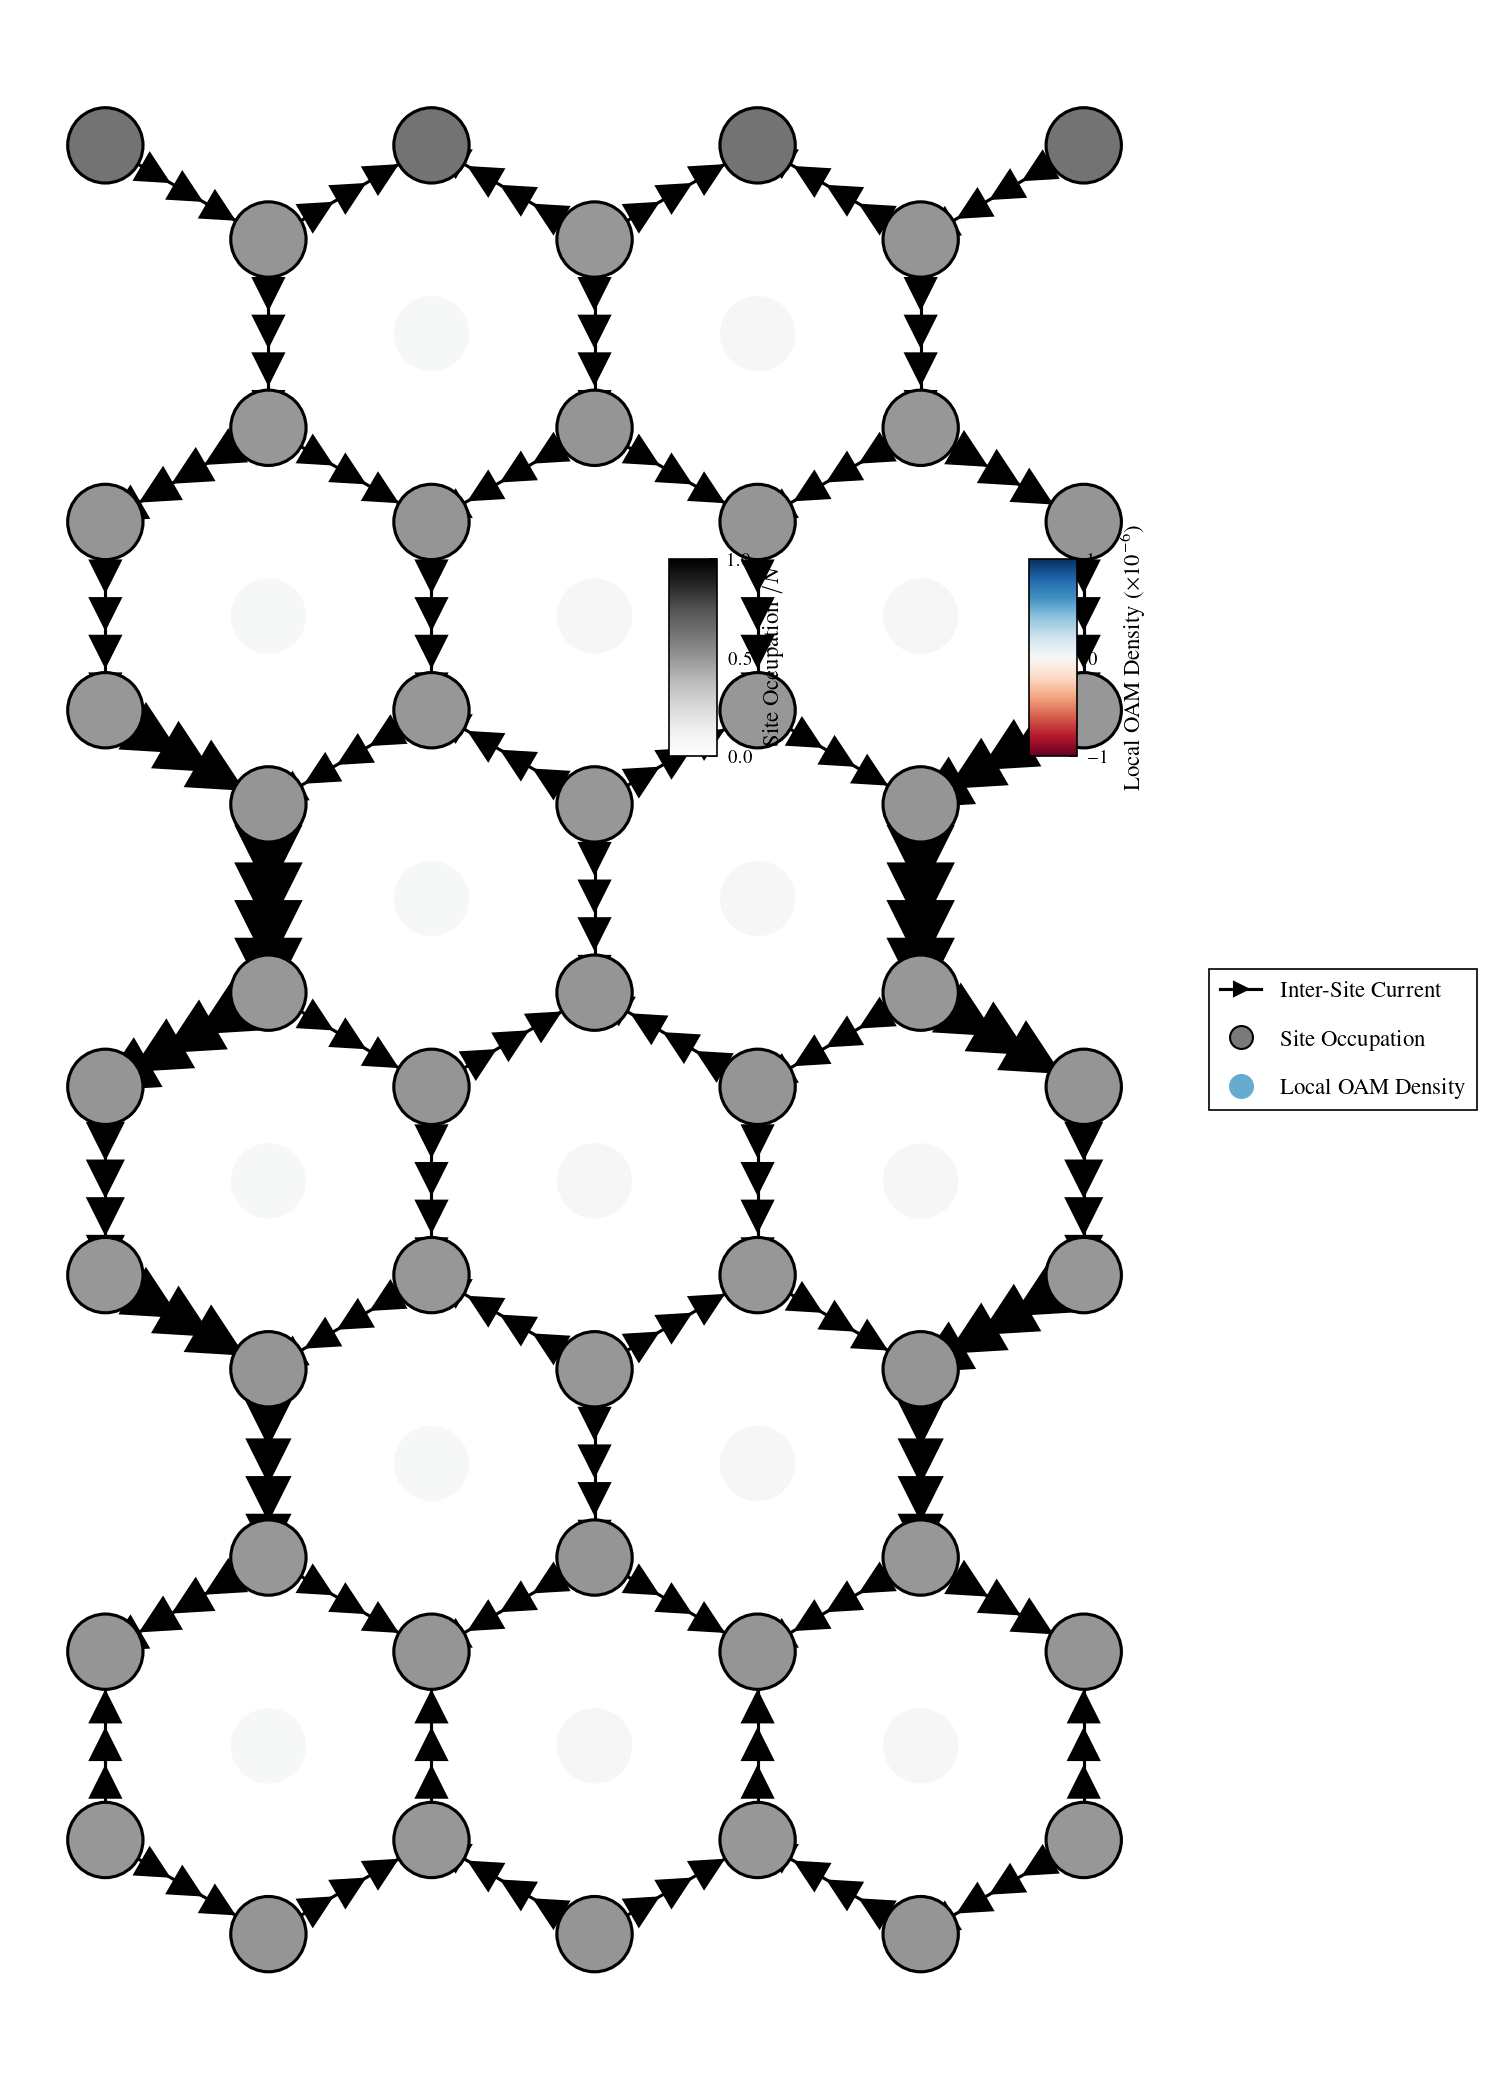

In [ ]:
l.plot_current_density(-1)

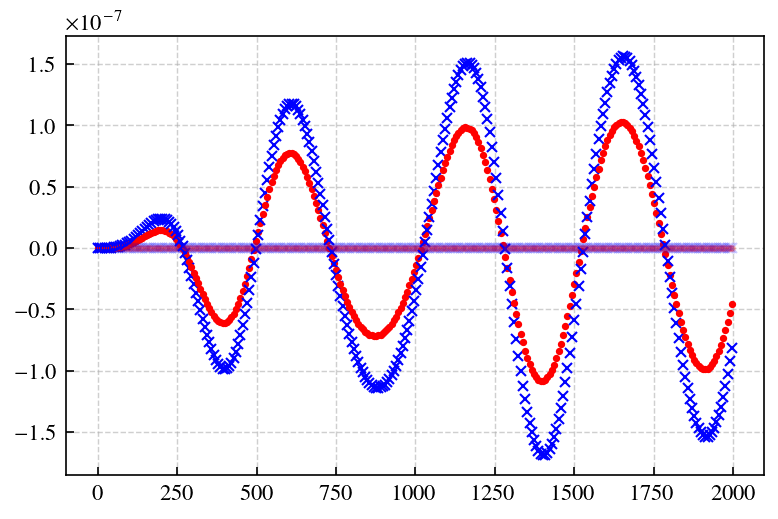

In [ ]:
def avg_current(J, geometry):
    N = J.shape[0]
    J_vecs = []
    for u in range(N):
        for v in range(u + 1, N):
            if (j := J[u, v]) == 0:
                continue

            x1, y1 = geometry.site_to_position(u)
            x2, y2 = geometry.site_to_position(v)

            J_vecs.append(
                j * np.array([x2 - x1, y2 - y1])
            )
    return np.mean(J_vecs, axis=0)

for i in range(1, len(l.states), 7):
    l_state = l.compute_lattice_state(l.states[i])
    prev_l_state = l.compute_lattice_state(l.states[i - 1])
    P_current = (l_state.polarisation - prev_l_state.polarisation) / l.h
    plt.plot(i, P_current[0], ".r", alpha=0.2)
    plt.plot(i, P_current[1], ".r")
    a_curr= avg_current(l_state.current, l.geometry) * 1.98
    plt.plot(i, a_curr[0], "xb", alpha=0.2)
    plt.plot(i, a_curr[1], "xb")

plt.show()

In [ ]:
d.plot_simulation_time_series()

In [ ]:
d = SimulationData(l, omega)

100%|██████████| 4001/4001 [00:04<00:00, 895.12it/s]


In [ ]:
l.save_current_density_animation("Low_E_long_ramp.mp4", fps=10, sample_every=10)

In [ ]:
l.h

0.01

In [43]:
t_values = np.arange(0, l.h * len(l.states), l.h)
E_values = l.E(t_values)
J_orb_values = np.array(
    [l._orbital_polarisation_current(l._current_density(l.states[i]), l._current_density(l.states[i-1]))[0] for i in range(1, len(l.states))]
)

start_index = np.argmax(t_values >= 5 * 2 * np.pi / omega)
t_steady = t_values[start_index:]
E_steady = E_values[start_index:]
J_orb_steady = J_orb_values[start_index:]

In [40]:
(np.angle(s) / omega) / l.h

np.float64(-8.602635229117888)

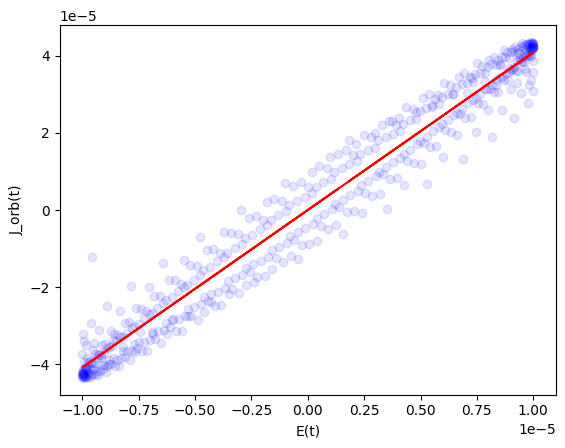

In [44]:
for (E, P) in zip(E_steady, J_orb_steady[9:]):
    plt.scatter(E, P, color="blue", alpha=0.1)

plt.plot(E_steady, abs(s) * E_steady, "r")

plt.xlabel("E(t)")
plt.ylabel("J_orb(t)")

plt.show()

In [8]:
shift = 147 + 247
slice_length = len(l.states) - shift - 1
# slice_length = len(l.states) // 3

cmap = plt.get_cmap("bone_r")

ohcs = []

for i, (e, p) in enumerate(zip(d.E[-slice_length:-1], (d.P_orb)[-slice_length-shift:-1-shift])):
    color = cmap(i / slice_length)
    plt.plot((e, d.E[-slice_length+i+1]), (p, d.P_orb[-slice_length-shift + i +1]), "-", color=color, markersize=4)


# plt.plot(d.E[-slice_length:-1], d.P_orb[-slice_length-shift:-1-shift], "-")

plt.xlabel("$E(t)$")
plt.ylabel("$P_{\\rm orb}(t-\\Delta t)$")

shift_w = shift * l.h * d.main_freq / (2 * np.pi)
plt.title(f"$\\omega\\Delta t = {shift_w:.3f}$")

# Normalize colorbar to show actual time values
norm = plt.Normalize(vmin=0, vmax=l.h*(slice_length-1))
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca())
cbar.set_label(r'Simulation Time ($t_{\rm hop}/\hbar$)', rotation=270, labelpad=14)
# Set ticks to show actual time values based on the slice
#time_ticks = np.linspace(0, l.h*(slice_length-1), 5)
#time_labels = [f"{l.h * d.t[-slice_length+int(tick)]:.1f}" for tick in time_ticks]
#cbar.set_ticks(time_ticks)
#cbar.set_ticklabels(time_labels)
#plt.savefig("orb_hall_cond_12x40_r_damped.pdf")
plt.show()


NameError: name 'd' is not defined

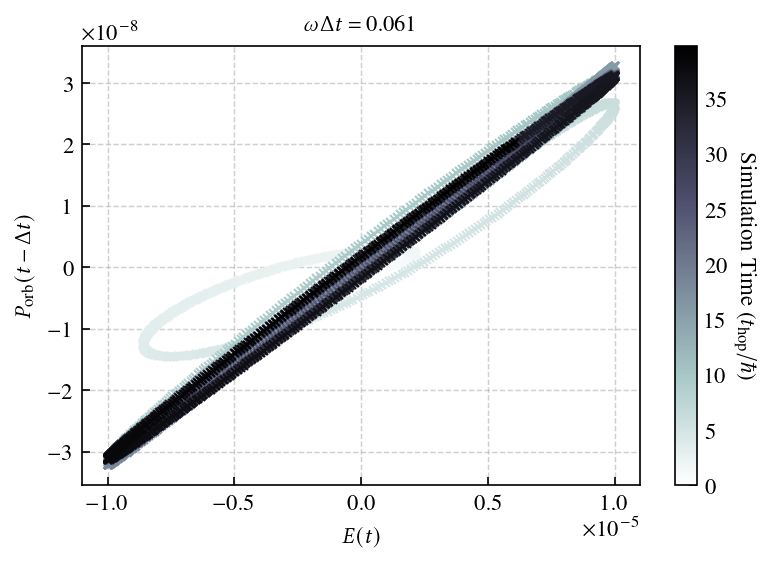

In [ ]:
shift = 30
slice_length = len(l.states) - shift - 1
# slice_length = len(l.states) // 3

cmap = plt.get_cmap("bone_r")

ohcs = []

for i, (e, p) in enumerate(zip(d.E[-slice_length:-1], (d.P_orb)[-slice_length-shift:-1-shift])):
    color = cmap(i / slice_length)

    p_curr = (d.P_orb[-slice_length-shift + i +1] - d.P_orb[-slice_length-shift + i]) / d.dt
    
    if e > E/10:
        ohcs.append(p_curr/e)
    plt.plot((e,) ,(p_curr,), "x", color=color, markersize=4)


# plt.plot(d.E[-slice_length:-1], d.P_orb[-slice_length-shift:-1-shift], "-")

plt.xlabel("$E(t)$")
plt.ylabel("$P_{\\rm orb}(t-\\Delta t)$")

shift_w = shift * l.h * d.main_freq / (2 * np.pi)
plt.title(f"$\\omega\\Delta t = {shift_w:.3f}$")

# Normalize colorbar to show actual time values
norm = plt.Normalize(vmin=0, vmax=l.h*(slice_length-1))
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca())
cbar.set_label(r'Simulation Time ($t_{\rm hop}/\hbar$)', rotation=270, labelpad=14)
# Set ticks to show actual time values based on the slice
#time_ticks = np.linspace(0, l.h*(slice_length-1), 5)
#time_labels = [f"{l.h * d.t[-slice_length+int(tick)]:.1f}" for tick in time_ticks]
#cbar.set_ticks(time_ticks)
#cbar.set_ticklabels(time_labels)
#plt.savefig("orb_hall_cond_12x40_r_damped.pdf")
plt.show()


In [ ]:
len(ohcs)

1785

In [ ]:
ohcs = np.array(ohcs[1000:])

In [ ]:
print(f"OHC; {np.mean(ohcs):.3f} ± {np.std(ohcs):.3f} (n={len(ohcs)})")

OHC; 0.003 ± 0.000 (n=785)


In [ ]:
A = l

A.set_fractional_occupation(0.4)
state = A.density_matrix.diagonal().reshape(A.geometry.dimensions[::-1])

i = A.N//2 +2
state = A.energy_states[:, i].reshape(A.geometry.dimensions[::-1])

plt.imshow(state*A.N, cmap="RdYlGn")
plt.title(i)
plt.colorbar()
plt.show()

In [ ]:
from matplotlib import animation
ims = []
fig, ax = plt.subplots()
s = 0
for i in range(s, len(l.states), 1):
    data = l.states[i].diagonal().real.reshape((14, 11))
    im = ax.imshow(data, animated=True)
    if i == s:
        ax.imshow(data)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)


ani.save("test3.mp4")

In [ ]:
for i in range(0, 50):
    plt.plot(
        d.P_orb_cols[i].keys(),
        d.P_orb_cols[i].values(),
        ".",
        label=f"t={i * d.dt:.2f}",
    )

plt.yscale("log")
plt.show()


In [ ]:
state = l.energy_states[:, 95]

for i in range(len(state)):
    x, y = l.geometry.site_to_position(i)
    if (x+y) % 2:
        state[i] = np.nan
        
fig, ax = plt.subplots(figsize=(l.Lx, l.Ly))
plot_site_grid(state, l.geometry, ax)
plot_site_connections(0.1*l.H_hop, l.geometry, ax, plot_flow_direction_arrows=False, label_connection_strength=False)

In [ ]:
from lattice import plot_site_connections, plot_site_grid
from tqdm import trange
from scipy.optimize import curve_fit

l = Lattice2D(
    BrickwallLatticeGeometry((21, 16)),
    SimulationParameters.default(),
)


def get_cols(state, geometry):
    cols = dict()
    for i, val in enumerate(state):
        if val is None or np.isnan(val):
            continue
        x, y = geometry.site_to_position(i)
        cols[round(x, 2)] = cols.get(round(x, 2), []) + [val]
    return cols


K = []
AB = 0

for k in trange(len(l.eigen_energies)):
    state = l.energy_states[:, k]

    for i in range(len(state)):
        x, y = l.geometry.site_to_position(i)
        if (x + y) % 2 == AB:
            state[i] = np.nan
    # state[1::2] = np.nan
    abs_max_index = -1
    kk = []
    for x, col in get_cols(state, l.geometry).items():
        col = np.array(col)
        abs_max_index = np.nanargmax(np.abs(col))
        off = 0
        if AB == 0:
            off = -(x % 2)
        if abs(col[abs_max_index]) > 0.0001:
            col /= np.nanmax(np.abs(col)) * np.sign(col[0])

            def sine_func(x, j, A):
                A = 1
                return A * np.sin(j * x)
            
            off2 = 0
            if AB == 0:
                off2 = -1
            x_values = np.arange(0.5 * (AB + x % 2) + off - off2, len(col) + 0.5 * (AB + x % 2) + off-off2)
            # Initial guess for parameters 
            p0 = [0.5, 1]
            try:
                popt, pcov = curve_fit(sine_func, x_values, col, p0=p0, bounds=([-np.pi, -1], [np.pi, 1]))
                max_freq, A = abs(popt[0]), popt[1]
                # print(f"FFT freq: {freqs[max_idx]}, Fitted freq: {max_freq2}, Fitted A: {popt[1]}")
                error = np.sqrt(np.diag(pcov))
                if error[0] < 0.02:
                    kk.append(max_freq)
            except Exception as e:
                error = 1000
                max_freq, A = 2 * np.pi * (k + 1) / (l.geometry.Ly + 1), -1
                print(f"Error in curve fitting for {k}")
        
    
        
        plt.plot(np.arange(0.5 * (x % 2 + AB) + off, len(col) + 0.5 * (x % 2 * AB)+off), col + np.random.random() * 0.05, label=x)

    plt.legend()
    plt.title(f"Eigenstate {k} at {l.eigen_energies[k]} with {error}")

    if len(kk) > 2:
        max_freq = np.mean(kk)
        K.append(max_freq)
        plt.plot(x_values, sine_func(x_values, max_freq, A), "o-")
        plt.savefig(f"experiments/07-04_bw_B/{K[-1]}_{k}.png", dpi=150)

    plt.close()
    # plt.show()

fig, ax = plt.subplots(figsize=(l.Lx, l.Ly))
plot_site_grid(state, l.geometry, ax)
plot_site_connections(0.1 * l.H_hop, l.geometry, ax, plot_flow_direction_arrows=False, label_connection_strength=False)

In [ ]:
K.sort()
plt.plot(K, ".")
plt.yticks(np.arange(-1, np.pi, 0.1))
plt.hlines(np.arange(1, l.geometry.Ly+1)*np.pi/(l.geometry.Ly+1), 0, len(K), color="red", label="Theoretical")

In [ ]:
l = Lattice2D(
    HexagonalLatticeGeometry((20, 4)),
    SimulationParameters.default(),
)

l.plot_hamiltonian()